# Modelado Estocástico
# Ejemplo AR - MA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.gridspec as gridspec

- Definimos los parámetros para la configuración general

In [ ]:
np.random.seed(42)
T = 250
sigma = 1
n = T
aleatorios = np.random.normal(0, sigma, n)
rho = 0.7
phi1, phi2 = 0.6, -0.3
theta1 = 0.8
theta_ma4 = [0.6, -0.4, 0.3, 0.2]


 $AR(1) = y_t = \rho  \ y_{t-1} + \epsilon_t$


In [ ]:
def proceso_ar1(rho, y_prev, error):
    return rho * y_prev + error

In [ ]:
y = np.zeros(n)
y[0] = aleatorios[0]

for i in range(1, n):
    error = aleatorios[i]
    y[i] = proceso_ar1(rho, y[i-1], error)

ar1 = y

$AR(2): y_t = \phi1 * y_{t-1} + \phi2 * y_{t-2} + \epsilon_t$

In [ ]:
y_ar2 = np.zeros(n)
y_ar2[0] = aleatorios[0]
y_ar2[1] = phi1 * y_ar2[0] + aleatorios[1]

for i in range(2, n):
    y_ar2[i] = phi1 * y_ar2[i - 1] + phi2 * y_ar2[i - 2] + aleatorios[i]

ar2 = y_ar2

$MA(1): y_t = \theta \epsilon_{t-1} + \epsilon_t$

In [ ]:
y_ma1 = np.zeros(n)
y_ma1[0] = aleatorios[0]

for i in range(1, n):
    y_ma1[i] = aleatorios[i] + theta1 * aleatorios[i - 1]

ma1 = y_ma1

$MA(2): y_t = \theta_1  \epsilon_{t-1} + \theta_2  \epsilon_{t-2} + \epsilon_t$


$MA(4): \epsilon_t + \theta_i \epsilon_{t-i}$  para $i = 1..4$

In [ ]:
y_ma4 = np.zeros(n)
for i in range(4, n):
    y_ma4[i] = aleatorios[i] + sum(theta_ma4[j] * aleatorios[i - j - 1] for j in range(4))

ma4 = y_ma4

$ARMA(1,1): y_t = \phi  y_{t-1} + e_t + \theta  e_{t-1}$

In [ ]:
arma_phi = 0.5
arma_theta = 0.8

In [ ]:
y_arma11 = np.zeros(T)
y_arma11[0] = aleatorios[0]
for t in range(1, T):
    y_arma11[t] = arma_phi * y_arma11[t - 1] + aleatorios[t] + arma_theta * aleatorios[t - 1]

arma11 = y_arma11

### GRÁFICOS DE SERIES, ACF Y PACF

In [ ]:
series = {
    'AR(1)': ar1,
    'AR(2)': ar2,
    'MA(1)': ma1,
    'MA(4)': ma4,
    'ARMA(1,1)': arma11
}

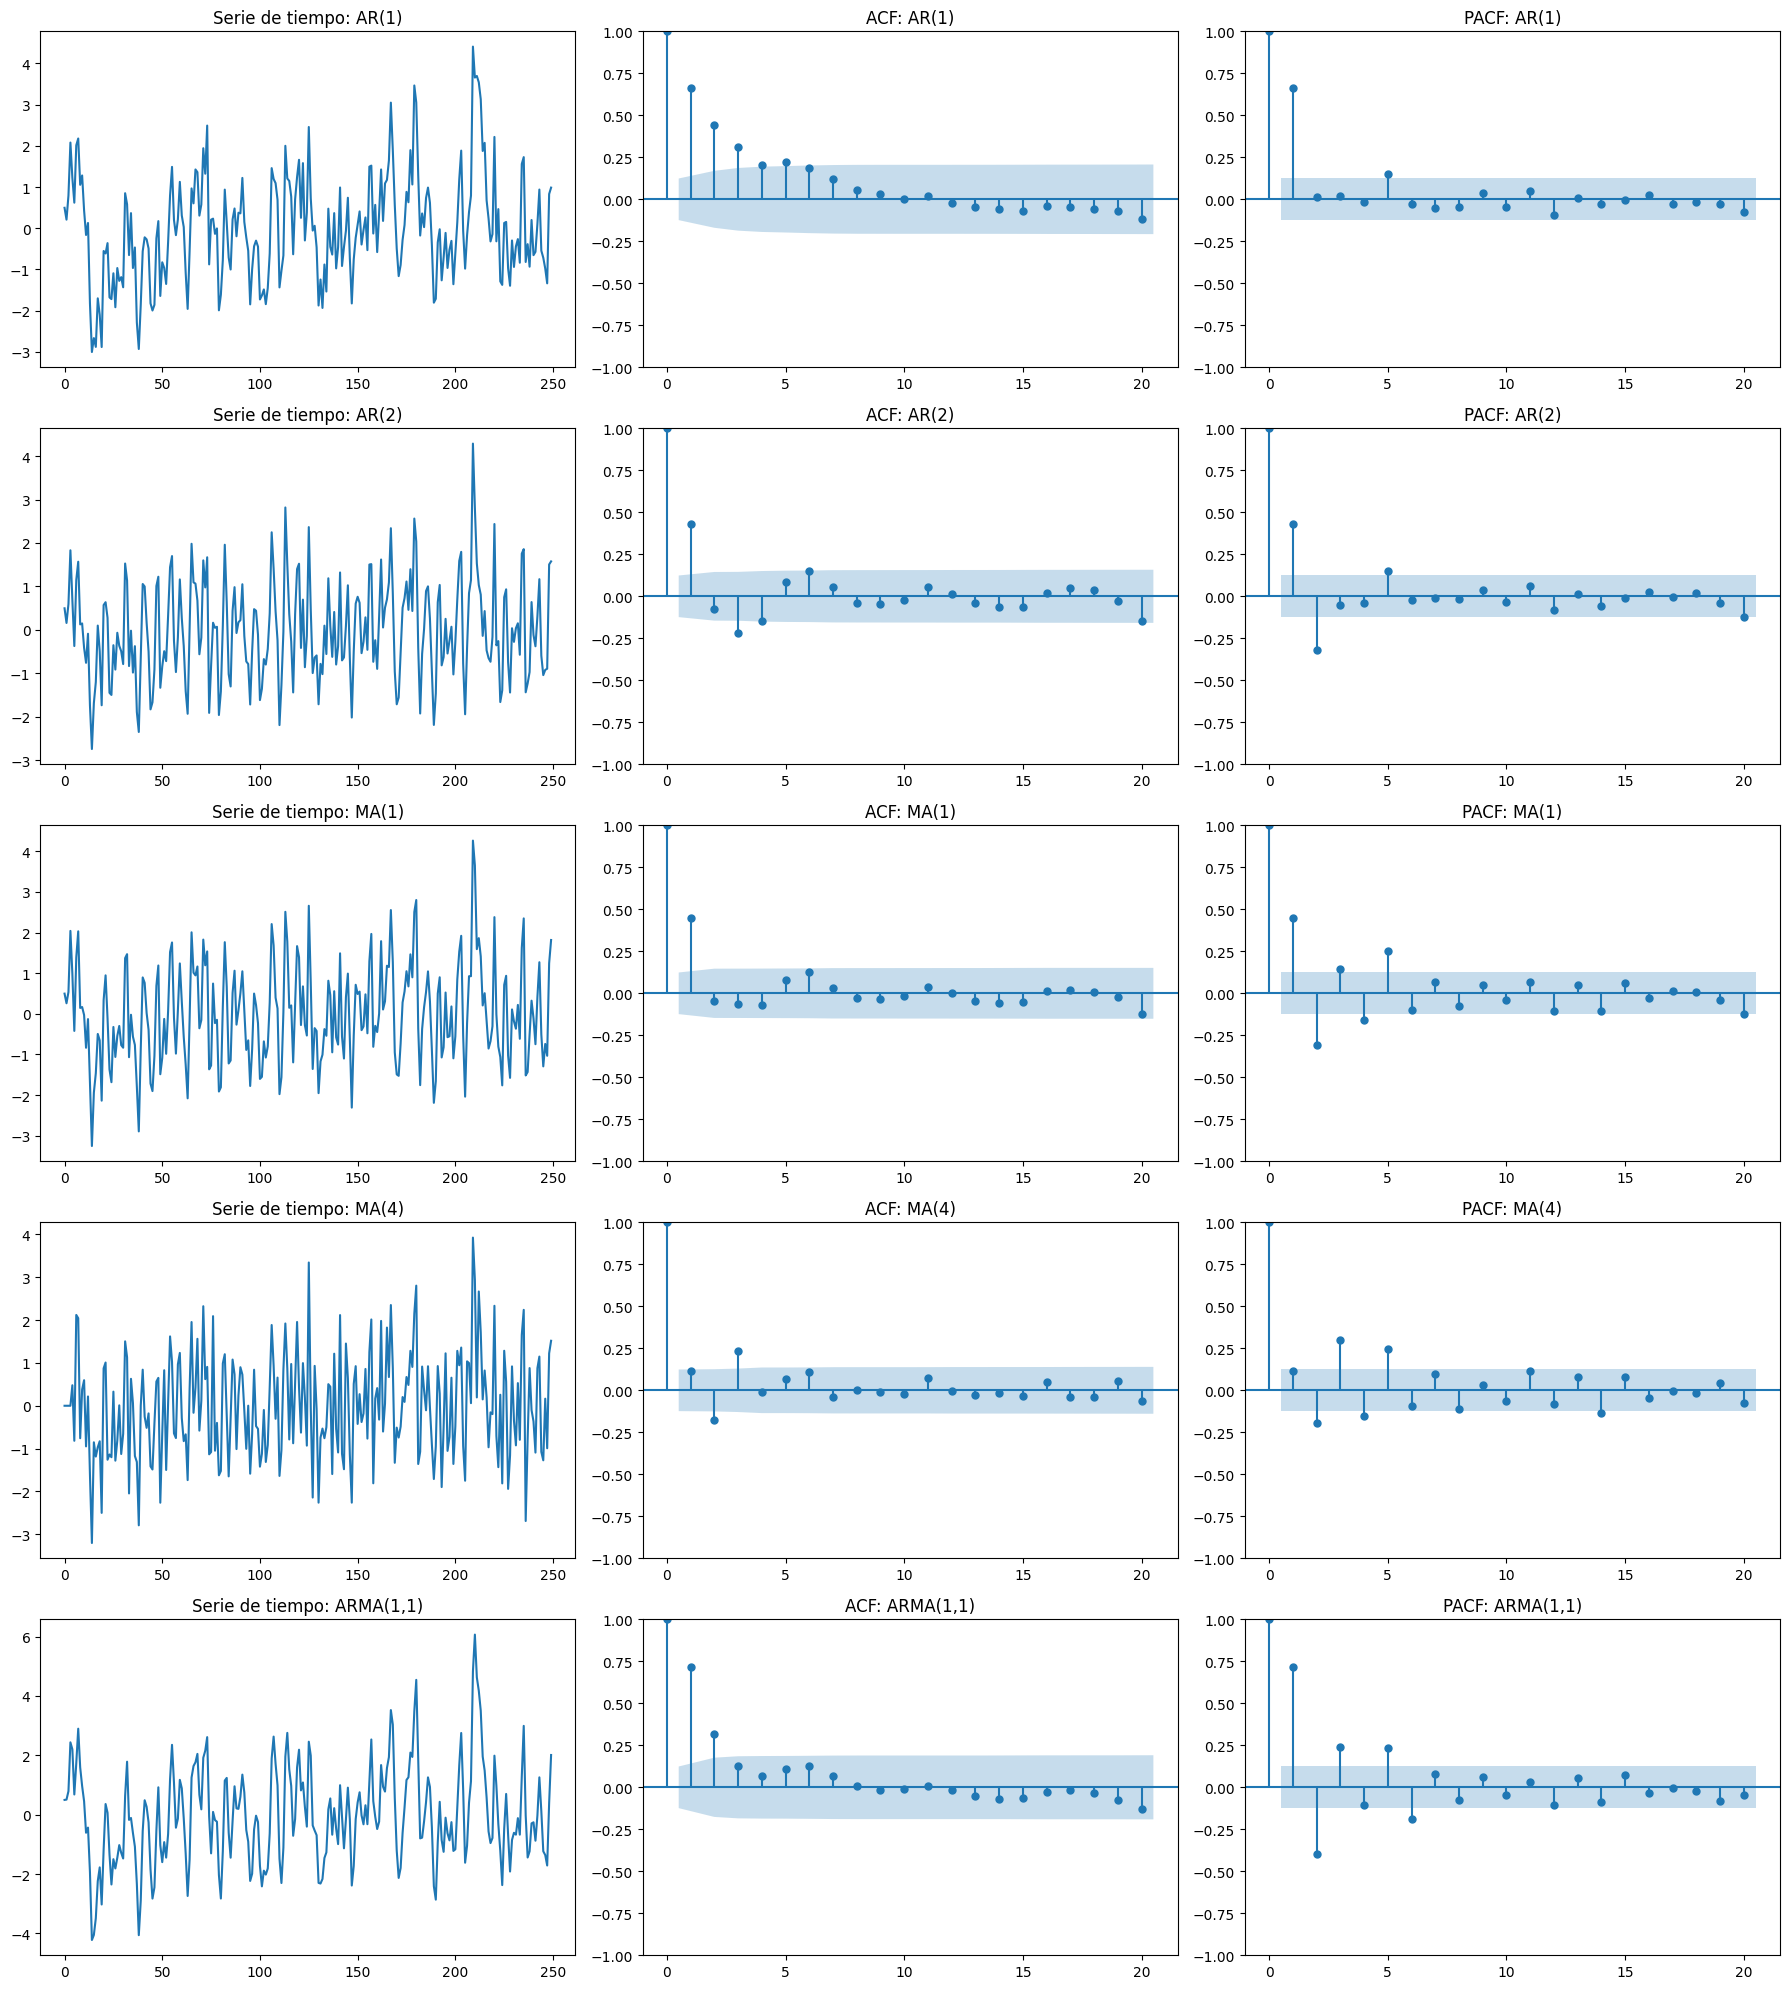

In [ ]:
fig = plt.figure(figsize=(18, 20))
gs = gridspec.GridSpec(len(series), 3, figure=fig)

for i, (name, y) in enumerate(series.items()):
    ax0 = fig.add_subplot(gs[i, 0])
    ax0.plot(y)
    ax0.set_title(f"Serie de tiempo: {name}")

    ax1 = fig.add_subplot(gs[i, 1])
    plot_acf(y, ax=ax1, lags=20, title=f"ACF: {name}")

    ax2 = fig.add_subplot(gs[i, 2])
    plot_pacf(y, ax=ax2, lags=20, title=f"PACF: {name}")

plt.tight_layout()
plt.show()